In [7]:
import numpy as np
from skimage import io
import util as ut
import math
import matplotlib.pyplot as plt
from skimage import util as skutil

## Teil 1 Morphologische Filter

In [8]:
def dilate(in_image, filter, iter_num):
    new_img = in_image.copy()

    for x in range(0, iter_num):
        t_img = np.zeros(new_img.shape)

        jc = int((filter.shape[0] - 1) / 2)
        ic = int((filter.shape[1] - 1) / 2)
    
        for j in range(0, filter.shape[0]):
            for i in range(0, filter.shape[1]):
                if filter[j][i] == 1:
                    tmp = np.roll(new_img, j - jc, axis=0)

                    # fix np.roll rollover (2,3,4 -> left shift 4,2,3 we want 0, 2, 3)
                    if j - jc < 0:
                        tmp[tmp.shape[0] + (j - jc):] = 0
                    elif j - jc > 0:
                        tmp[:(j - jc)] = 0
                    
                    tmp = np.roll(tmp, i - ic, axis=1)
                    if i - ic < 0:
                        tmp[:, tmp.shape[1]+ (i - ic):] = 0
                    elif i - ic > 0:
                        tmp[:, :(i - ic)] = 0

                    t_img = np.fmax(tmp, t_img) 
        new_img = t_img
    
    return new_img

In [9]:
def erode(in_image, filter, iter_num, debug=False):
    inverted_img = 255 - in_image
    if debug:
        ut.printImage(inverted_img)
    t_img = dilate(inverted_img, filter, iter_num)
    if debug:
        ut.printImage(t_img)
    result = 255 - t_img
    if debug:
        ut.printImage(result)
    return result

In [10]:
def open(in_img, filter, iter):
    tmp = in_img.copy()
    tmp = erode(tmp, filter, iter)
    tmp = dilate(tmp, filter, iter)
    return tmp

def close(in_img, filter, iter):
    tmp = in_img.copy()
    tmp = dilate(tmp, filter, iter)
    tmp = erode(tmp, filter, iter)
    return tmp

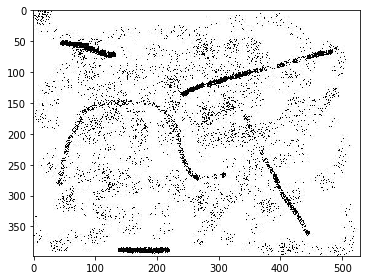

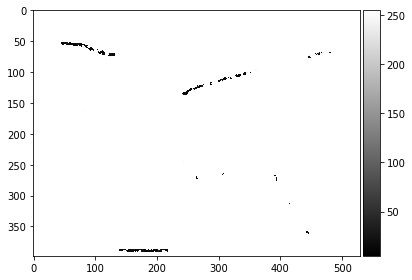

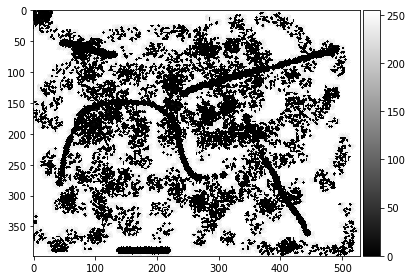

In [11]:
# Testing
# read img
img_1 = io.imread("A6/dots.jpg")

# print image
ut.printImage(img_1)

H = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# dilate
img_3 = dilate(img_1, H, 2)
ut.printImage(img_3)

# erode
img_2 = erode(img_1, H, 2, False)
ut.printImage(img_2)


## Teil 2 experiment and modify:

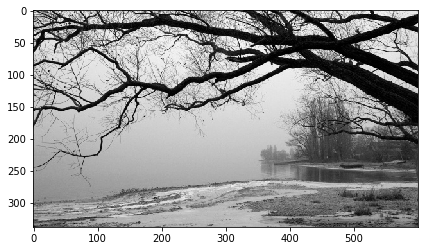

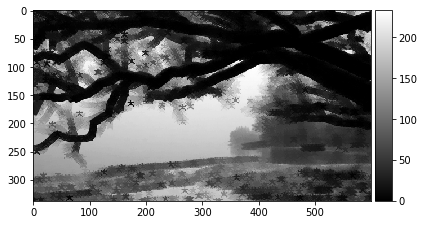

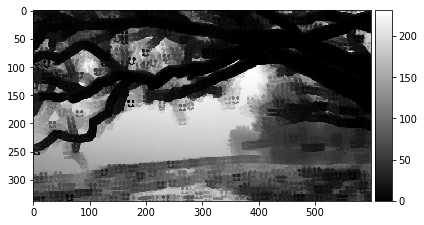

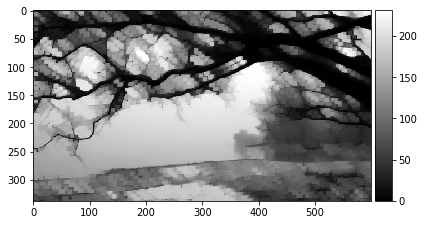

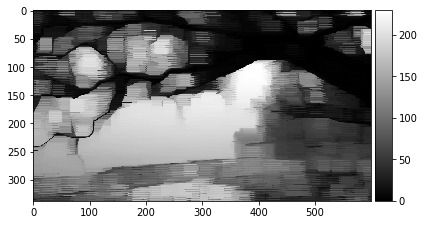

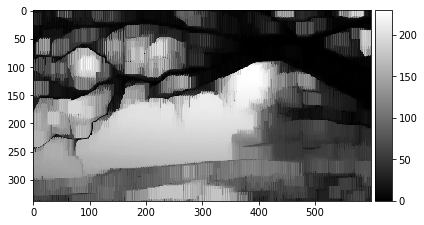

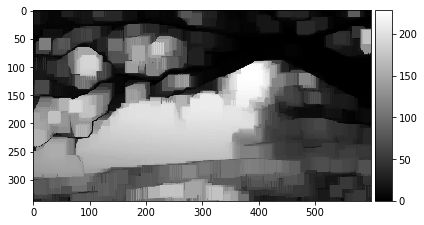

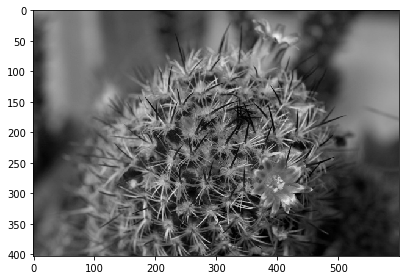

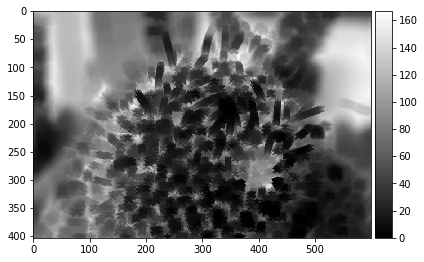

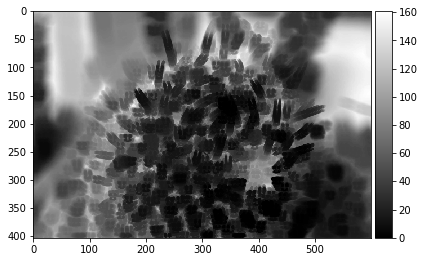

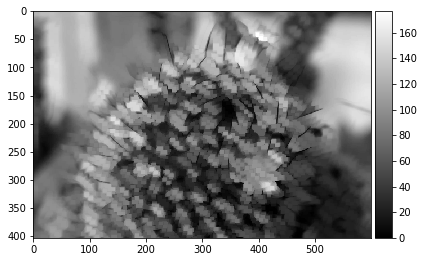

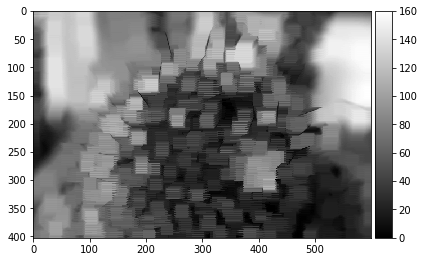

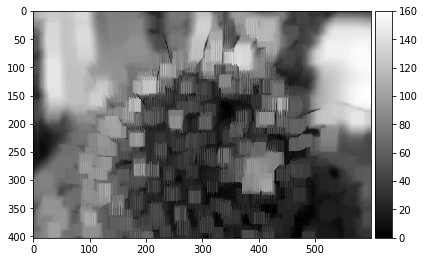

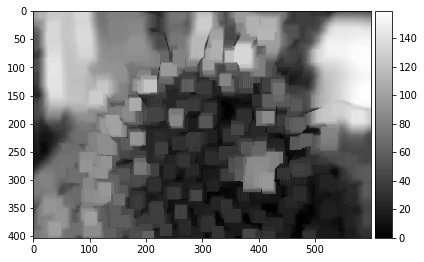

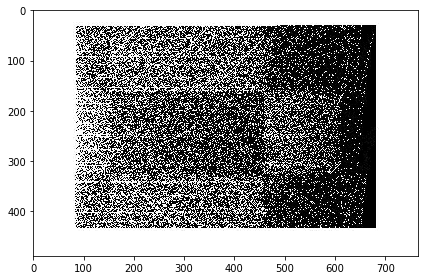

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


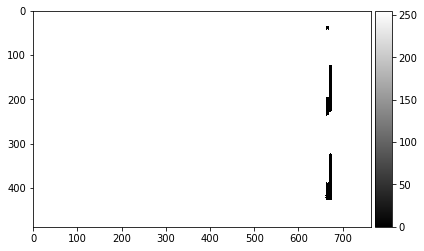

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


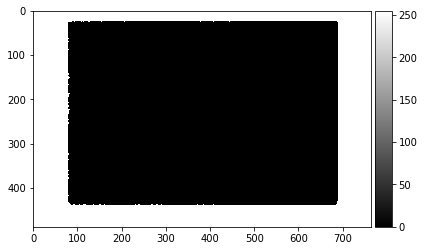

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


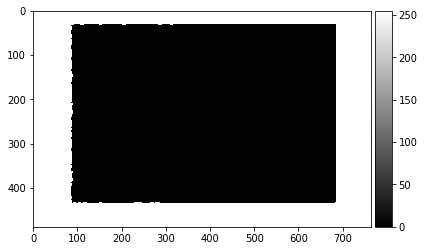

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


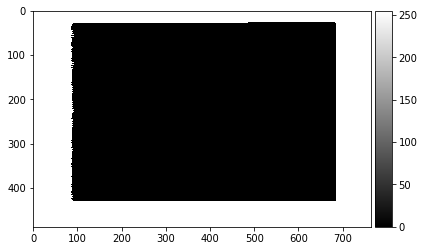

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


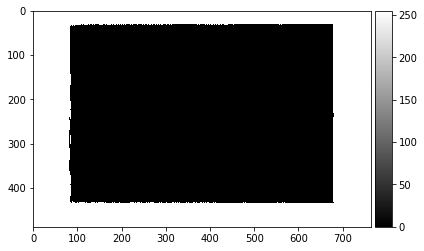

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


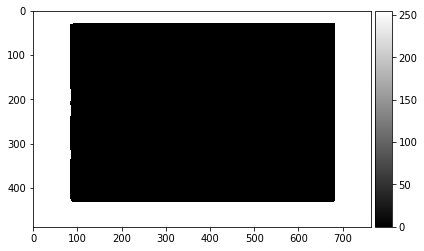

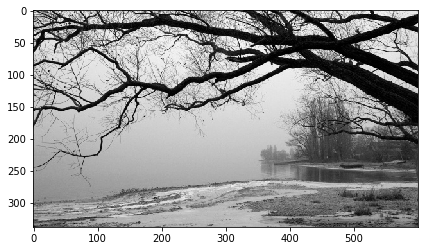

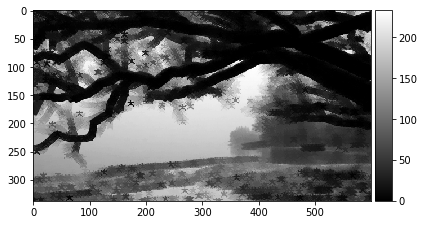

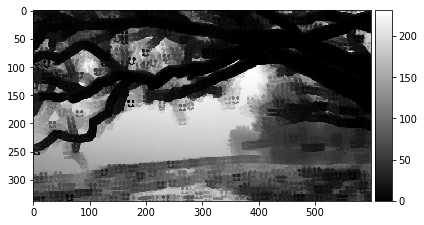

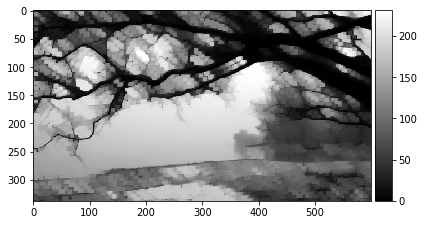

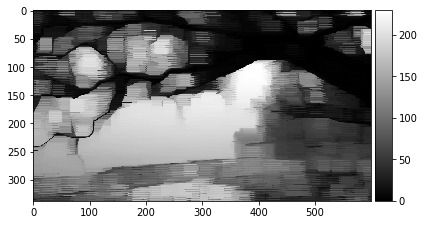

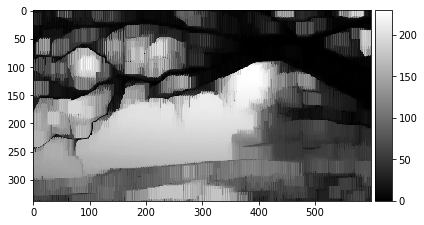

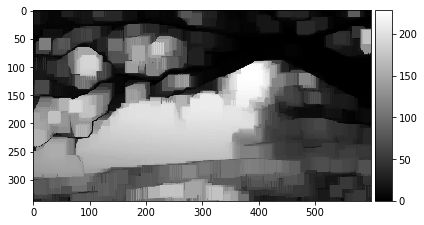

In [13]:
Z = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
])

Star = np.array([
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

Smiley = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

Chess = np.array([
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
])

Lines = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

Vertical = np.transpose(Lines)

ut.printImage(img_1)

img_11 = erode(img_1, Star, 1)
ut.printImage(img_11)

img_12 = erode(img_1, Smiley, 1)
ut.printImage(img_12)

img_13 = open(img_1, Chess, 1)
ut.printImage(img_13)

img_14 = open(img_1, Lines, 1)
ut.printImage(img_14)

img_15 = open(img_1, Vertical, 1)
ut.printImage(img_15)

img_16 = open(img_14, Vertical, 1)
ut.printImage(img_16)

# Bild 2
img_1 = io.imread("A6/cactus.jpg")

ut.printImage(img_1)

img_11 = erode(img_1, Star, 1)
ut.printImage(img_11)

img_12 = erode(img_1, Smiley, 1)
ut.printImage(img_12)

img_13 = open(img_1, Chess, 1)
ut.printImage(img_13)

img_14 = open(img_1, Lines, 1)
ut.printImage(img_14)

img_15 = open(img_1, Vertical, 1)
ut.printImage(img_15)

img_16 = open(img_14, Vertical, 1)
ut.printImage(img_16)

# Bild 3
img_1 = io.imread("A6/edge.jpg")

ut.printImage(img_1)

img_11 = dilate(img_1, Star, 1)
ut.printImage(img_11)

img_12 = erode(img_1, Smiley, 1)
ut.printImage(img_12)

img_13 = open(img_1, Chess, 1)
ut.printImage(img_13)

img_14 = open(img_1, Lines, 1)
ut.printImage(img_14)

img_15 = open(img_1, Vertical, 1)
ut.printImage(img_15)

img_16 = open(img_14, Vertical, 1)
ut.printImage(img_16)

# Bild 4
img_1 = io.imread("A6/fhorn.jpg")

ut.printImage(img_1)

img_11 = erode(img_1, Star, 1)
ut.printImage(img_11)

img_12 = erode(img_1, Smiley, 1)
ut.printImage(img_12)

img_13 = open(img_1, Chess, 1)
ut.printImage(img_13)

img_14 = open(img_1, Lines, 1)
ut.printImage(img_14)

img_15 = open(img_1, Vertical, 1)
ut.printImage(img_15)

img_16 = open(img_14, Vertical, 1)
ut.printImage(img_16)